In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [150]:
#Solar flare data: http://archive.ics.uci.edu/ml/datasets/Solar+Flare
#df = pd.read_csv('C:\\Users\\ryan\\Desktop\\Thinkful DS Sample Data - Main Course\\Unit 3\\flare_data1.csv')
#Only use data2 - the source says it is more reliable
df2 = pd.read_csv('C:\\Users\\ryan\\Desktop\\Thinkful DS Sample Data - Main Course\\Unit 3\\flare_data2.csv')

In [151]:
#Rename columns so that we can combine dataset 1 and dataset 2
#df.columns = ['Orig']
df2.columns = ['Orig']

In [152]:
#Remove spaces from both datasets
#for row in range(len(df)):
    #df.ix[row][0] = df.ix[row][0].replace(" ", "")
    
for row in range(len(df2)):
    df2.ix[row][0] = df2.ix[row][0].replace(" ", "")

In [6]:
#for row in range(len(df)):
    #count = 0
    #print('new row')
    #for char in range(len(df.ix[row][0])):
        #print(df.ix[row][0][char])
        #col_nm = 'col_{}'.format(count)
        #df.ix[row, col_nm] = df.ix[row][0][char]
        #count = count + 1


In [153]:
for row in range(len(df2)):
    count = 0
    #print('new row')
    for char in range(len(df2.ix[row][0])):
        #print(df2.ix[row][0][char])
        col_nm = 'col_{}'.format(count)
        df2.ix[row, col_nm] = df2.ix[row][0][char]
        count = count + 1

In [154]:
df2.head()

,Orig,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12
0,HAX1311111000,H,A,X,1,3,1,1,1,1,1,0,0,0
1,DRO1311211000,D,R,O,1,3,1,1,2,1,1,0,0,0
2,CSO1311211000,C,S,O,1,3,1,1,2,1,1,0,0,0
3,HRX1211111000,H,R,X,1,2,1,1,1,1,1,0,0,0
4,HSX1111211000,H,S,X,1,1,1,1,2,1,1,0,0,0


In [155]:
#df.columns = ['Orig', 'Zurich_Class', 'Largest_Spot_Size', 'Spot_Distribution', 'Activity', 'Evolution', 'Prev_24hr_Flare_Activity',
              #'Historically_Complex', 'Historically_Complex_This_Pass', 'Area', 'Area_Largest_Spot', 'Num_C_Class_Flares',
              #'Num_M_Class_Flares', 'Num_X_Class_Flares']

df2.columns = ['Orig', 'Zurich_Class', 'Largest_Spot_Size', 'Spot_Distribution', 'Activity', 'Evolution', 'Prev_24hr_Flare_Activity',
              'Historically_Complex', 'Historically_Complex_This_Pass', 'Area', 'Area_Largest_Spot', 'Num_C_Class_Flares',
              'Num_M_Class_Flares', 'Num_X_Class_Flares']

In [10]:
#df = df.append(df2)

In [163]:
df2.drop(['Orig'], axis = 1, inplace = True)

#set df = df2 since we are not going to use the original df now
df = pd.DataFrame(df2)

In [164]:
df.head()

,Zurich_Class,Largest_Spot_Size,Spot_Distribution,Activity,Evolution,Prev_24hr_Flare_Activity,Historically_Complex,Historically_Complex_This_Pass,Area,Area_Largest_Spot,Num_C_Class_Flares,Num_M_Class_Flares,Num_X_Class_Flares
0,H,A,X,1,3,1,1,1,1,1,0,0,0
1,D,R,O,1,3,1,1,2,1,1,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,H,R,X,1,2,1,1,1,1,1,0,0,0
4,H,S,X,1,1,1,1,2,1,1,0,0,0


In [165]:
num_cols =  ['Activity', 'Evolution', 'Prev_24hr_Flare_Activity',
              'Historically_Complex', 'Historically_Complex_This_Pass', 'Area', 'Area_Largest_Spot', 'Num_C_Class_Flares',
              'Num_M_Class_Flares', 'Num_X_Class_Flares']

for col in num_cols:
    df[col] = df[col].apply(lambda x: float(x))

In [166]:
df['Total_Flares'] = df['Num_C_Class_Flares'] + df['Num_M_Class_Flares'] + df['Num_X_Class_Flares']

In [167]:
df.head()

,Zurich_Class,Largest_Spot_Size,Spot_Distribution,Activity,Evolution,Prev_24hr_Flare_Activity,Historically_Complex,Historically_Complex_This_Pass,Area,Area_Largest_Spot,Num_C_Class_Flares,Num_M_Class_Flares,Num_X_Class_Flares,Total_Flares
0,H,A,X,1.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,D,R,O,1.0,3.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0
2,C,S,O,1.0,3.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0
3,H,R,X,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,H,S,X,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0


In [168]:
df_features = df.ix[:, 0:10]
df_target = df.ix[:, 13]

In [169]:
#Need numerical features... so let's use get_dummies for the string categorical variables

dummy_features = pd.get_dummies(df_features.ix[:, 0:3])
num_features = df_features.ix[:, 3:]

features_final = pd.concat([dummy_features, num_features], axis=1)

In [170]:
features_final.head()

,Zurich_Class_B,Zurich_Class_C,Zurich_Class_D,Zurich_Class_E,Zurich_Class_F,Zurich_Class_H,Largest_Spot_Size_A,Largest_Spot_Size_H,Largest_Spot_Size_K,Largest_Spot_Size_R,...,Spot_Distribution_I,Spot_Distribution_O,Spot_Distribution_X,Activity,Evolution,Prev_24hr_Flare_Activity,Historically_Complex,Historically_Complex_This_Pass,Area,Area_Largest_Spot
0,0,0,0,0,0,1,1,0,0,0,...,0,0,1,1.0,3.0,1.0,1.0,1.0,1.0,1.0
1,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1.0,3.0,1.0,1.0,2.0,1.0,1.0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1.0,3.0,1.0,1.0,2.0,1.0,1.0
3,0,0,0,0,0,1,0,0,0,1,...,0,0,1,1.0,2.0,1.0,1.0,1.0,1.0,1.0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1.0,1.0,1.0,1.0,2.0,1.0,1.0


In [171]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4
)

decision_tree.fit(features_final, df_target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=1, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

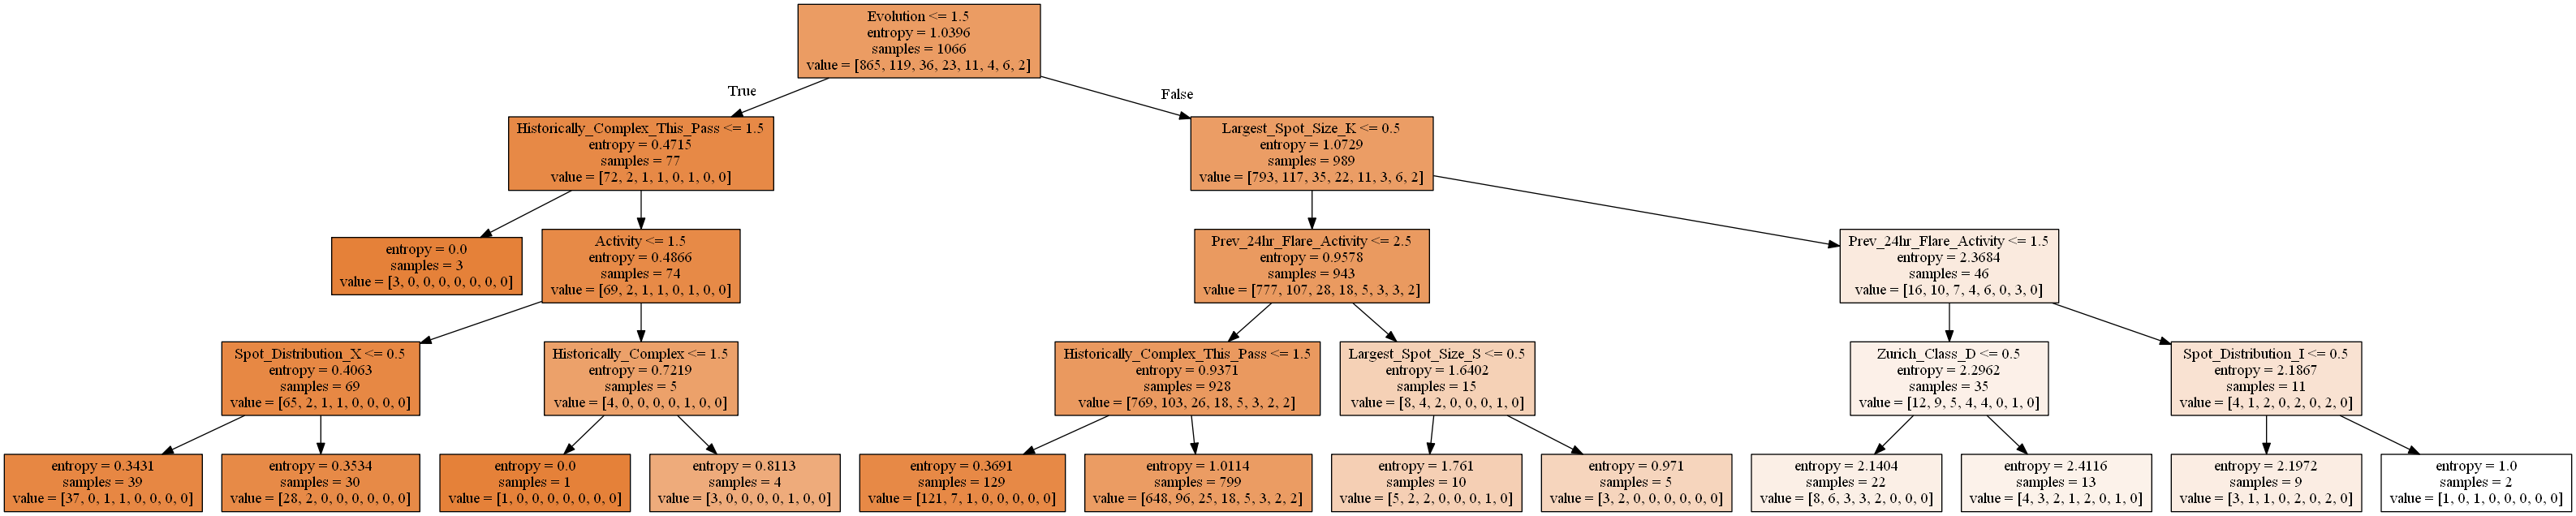

In [172]:
# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=features_final.columns,
    #class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

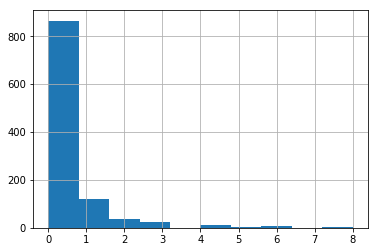

In [173]:
df_target.hist()
plt.show()

In [174]:
#Since the data is very unequally distributed, and there are not many samples with > 1 flare, let's condense all flare counts > 1 
#into 1 category, so we have a binary outcome (no flare or flare)
binary_outcome = pd.DataFrame()
binary_outcome['Outcome'] = df['Total_Flares'].apply(lambda x: 1 if x > 0 else 0)

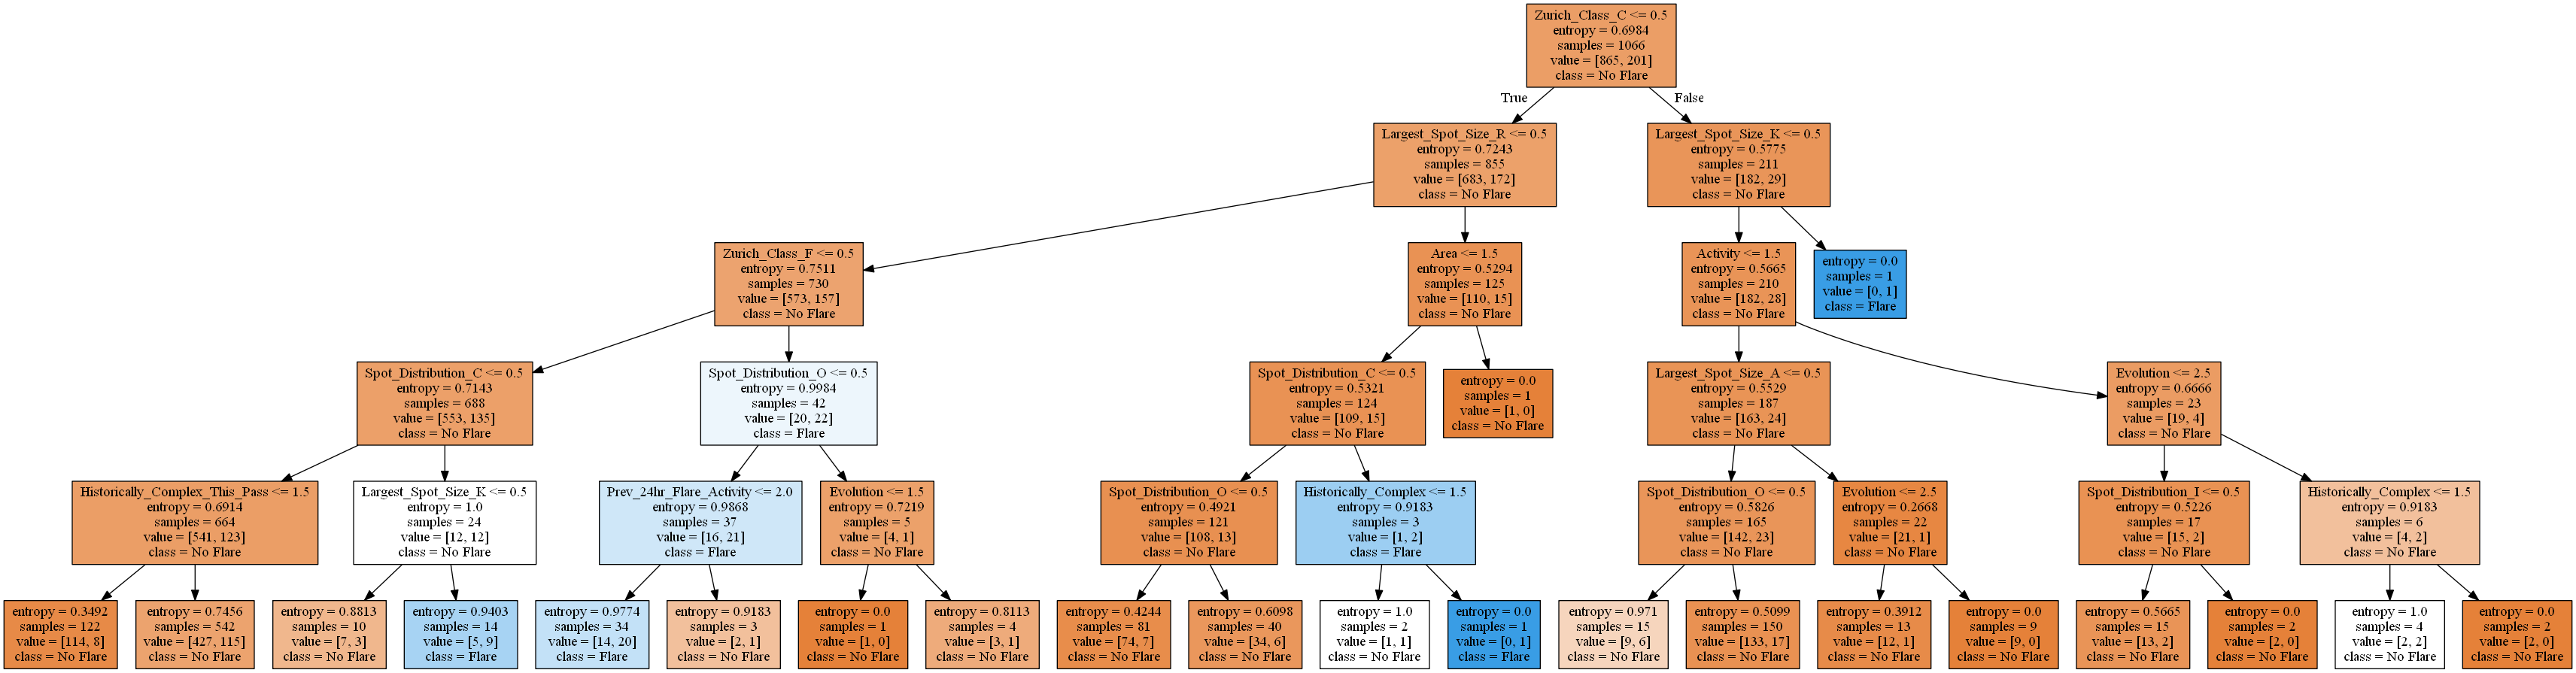

In [175]:
# Initialize and train our NEW tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=5
)

decision_tree.fit(features_final, binary_outcome)


# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=features_final.columns,
    class_names=['No Flare', 'Flare'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [176]:
#The tree is very biased towards the dominant class (no flare), so balanced data is needed.

new_df = pd.concat([features_final, binary_outcome], axis=1)

In [177]:
new_df.head()

,Zurich_Class_B,Zurich_Class_C,Zurich_Class_D,Zurich_Class_E,Zurich_Class_F,Zurich_Class_H,Largest_Spot_Size_A,Largest_Spot_Size_H,Largest_Spot_Size_K,Largest_Spot_Size_R,...,Spot_Distribution_O,Spot_Distribution_X,Activity,Evolution,Prev_24hr_Flare_Activity,Historically_Complex,Historically_Complex_This_Pass,Area,Area_Largest_Spot,Outcome
0,0,0,0,0,0,1,1,0,0,0,...,0,1,1.0,3.0,1.0,1.0,1.0,1.0,1.0,0
1,0,0,1,0,0,0,0,0,0,1,...,1,0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,0
3,0,0,0,0,0,1,0,0,0,1,...,0,1,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0


In [178]:
print(len(new_df[new_df['Outcome']==1]))
print(len(new_df))

201
1066


In [179]:
#Start by adding all of the positive outcomes (flare = true)
balanced_df_p1 = new_df[new_df['Outcome']==1]

#Still need to add 259 non-flare samples
balanced_df_p2 = new_df[new_df['Outcome']==0].sample(259)

#Combine the datasets to get a final, balanced dataset
balanced_df = balanced_df_p1.append(balanced_df_p2)

In [180]:
balanced_df.drop(['Outcome'], axis = 1)

,Zurich_Class_B,Zurich_Class_C,Zurich_Class_D,Zurich_Class_E,Zurich_Class_F,Zurich_Class_H,Largest_Spot_Size_A,Largest_Spot_Size_H,Largest_Spot_Size_K,Largest_Spot_Size_R,...,Spot_Distribution_I,Spot_Distribution_O,Spot_Distribution_X,Activity,Evolution,Prev_24hr_Flare_Activity,Historically_Complex,Historically_Complex_This_Pass,Area,Area_Largest_Spot
8,0,1,0,0,0,0,1,0,0,0,...,0,1,0,1.0,2.0,1.0,1.0,2.0,1.0,1.0
16,0,0,1,0,0,0,0,0,0,1,...,1,0,0,1.0,3.0,1.0,1.0,2.0,1.0,1.0
23,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1.0,3.0,1.0,1.0,2.0,1.0,1.0
26,0,0,1,0,0,0,1,0,0,0,...,1,0,0,2.0,3.0,1.0,1.0,2.0,1.0,1.0
37,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1.0,3.0,1.0,1.0,2.0,1.0,1.0
38,0,0,0,0,0,1,1,0,0,0,...,0,0,1,1.0,2.0,1.0,1.0,1.0,1.0,1.0
39,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1.0,2.0,1.0,2.0,2.0,1.0,1.0
42,0,0,1,0,0,0,0,0,1,0,...,1,0,0,2.0,3.0,1.0,2.0,2.0,1.0,1.0
43,0,0,0,1,0,0,1,0,0,0,...,1,0,0,2.0,2.0,1.0,1.0,2.0,1.0,1.0
48,0,0,1,0,0,0,1,0,0,0,...,0,1,0,2.0,3.0,3.0,2.0,2.0,1.0,1.0


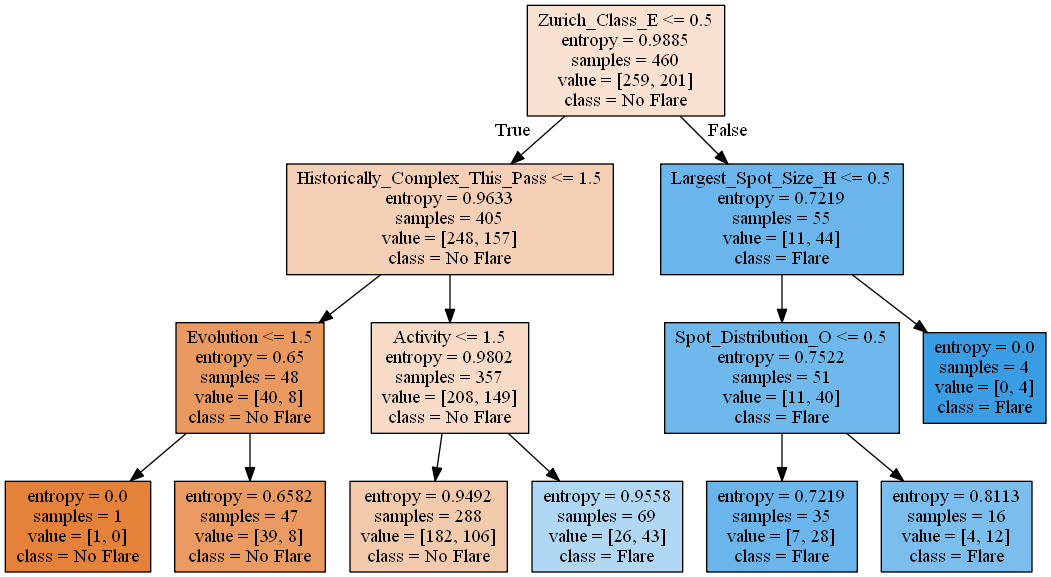

In [181]:
# Initialize and train our NEW tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features='auto',
    max_depth=3 #DEPTH LOOP CODE SHOWED 3 IS OPTIMAL FOR RANDOM FOREST, SO WE WILL USE 3 IN DECISION TREE FOR COMPARISON
)

decision_tree.fit(balanced_df.drop(['Outcome'], axis = 1), balanced_df['Outcome'])


# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=features_final.columns,
    class_names=['No Flare', 'Flare'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [182]:
#Run some cross-validation on the tree to see the accuracy rates
#########Correct to re-fit the model in each Cross Val??############

X = balanced_df.drop(['Outcome'], axis = 1)
y = balanced_df['Outcome']

accuracy = []

from sklearn import cross_validation
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

test_no = 1
kf = KFold(n_splits=5, shuffle = True) 
#DATA IN BALANCED_DF IS ALL 0s then 1s...won't make for good Cross Val, SO WE USE SHUFFLE FROM KFOLD

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #Use regr model defined above
    predicted = decision_tree.fit(X_train, y_train).predict(X_test)
    actual = y_test
    print('Decision Tree Actual vs. Predicted Flare: Fold', test_no)
    print('Decision Tree Accuracy:', 1 - (actual!=predicted).sum()/len(actual))
    accuracy.append(1 - (actual!=predicted).sum()/len(actual))
    test_no = test_no + 1
print(np.mean(accuracy))

Decision Tree Actual vs. Predicted Flare: Fold 1
Decision Tree Accuracy: 0.717391304348
Decision Tree Actual vs. Predicted Flare: Fold 2
Decision Tree Accuracy: 0.782608695652
Decision Tree Actual vs. Predicted Flare: Fold 3
Decision Tree Accuracy: 0.608695652174
Decision Tree Actual vs. Predicted Flare: Fold 4
Decision Tree Accuracy: 0.695652173913
Decision Tree Actual vs. Predicted Flare: Fold 5
Decision Tree Accuracy: 0.586956521739
0.678260869565


In [184]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

##NEED TO SHUFFLE THE X & Y DATA FOR THE RANDOM FOREST AS WELL

rfc = ensemble.RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_features = 'auto', max_depth = 3)
X = balanced_df.drop(['Outcome'], axis = 1)
y = balanced_df['Outcome']

accuracy = []

test_no = 1
kf = KFold(n_splits=5, shuffle = True) 
#DATA IN BALANCED_DF IS ALL 0s then 1s...won't make for good Cross Val, SO WE USE SHUFFLE FROM KFOLD

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #Use regr model defined above
    predicted = rfc.fit(X_train, y_train).predict(X_test)
    actual = y_test
    print('Random Forest Actual vs. Predicted Flare: Fold', test_no)
    print('Random Forest Accuracy:', 1 - (actual!=predicted).sum()/len(actual))
    accuracy.append(1 - (actual!=predicted).sum()/len(actual))
    test_no = test_no + 1
print(np.mean(accuracy))


Random Forest Actual vs. Predicted Flare: Fold 1
Random Forest Accuracy: 0.673913043478
Random Forest Actual vs. Predicted Flare: Fold 2
Random Forest Accuracy: 0.695652173913
Random Forest Actual vs. Predicted Flare: Fold 3
Random Forest Accuracy: 0.695652173913
Random Forest Actual vs. Predicted Flare: Fold 4
Random Forest Accuracy: 0.760869565217
Random Forest Actual vs. Predicted Flare: Fold 5
Random Forest Accuracy: 0.728260869565
0.710869565217


In [186]:
##OPTIMIZE FOR DEPTH

from sklearn import ensemble
from sklearn.model_selection import cross_val_score


for depth in range(10):
    rfc = ensemble.RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_features = 'auto', max_depth = depth + 1)
    X = balanced_df.drop(['Outcome'], axis = 1)
    Y = balanced_df['Outcome']
    print('depth', depth + 1)
    accuracy = []

    test_no = 1
    kf = KFold(n_splits=5, shuffle = True) 
    #DATA IN BALANCED_DF IS ALL 0s then 1s...won't make for good Cross Val, SO WE USE SHUFFLE FROM KFOLD

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        #Use regr model defined above
        predicted = rfc.fit(X_train, y_train).predict(X_test)
        actual = y_test
        #print('Random Forest Actual vs. Predicted Flare: Fold', test_no)
        #print('Random Forest Accuracy:', 1 - (actual!=predicted).sum()/len(actual))
        accuracy.append(1 - (actual!=predicted).sum()/len(actual))
        test_no = test_no + 1
    print(np.mean(accuracy))

depth 1
0.641304347826
depth 2
0.702173913043
depth 3
0.708695652174
depth 4
0.708695652174
depth 5
0.697826086957
depth 6
0.691304347826
depth 7
0.7
depth 8
0.684782608696
depth 9
0.665217391304
depth 10
0.652173913043


In [187]:
##OPTIMIZE FOR MIN SAMPLES AT LEAF

leaf_sizes = [1,2,5,10,20,50,100]

for min_leaf in leaf_sizes:
    rfc = ensemble.RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_features = 'auto', max_depth = 3, min_samples_leaf = min_leaf)
    X = balanced_df.drop(['Outcome'], axis = 1)
    Y = balanced_df['Outcome']
    print('min samples at leaf = ', min_leaf, 'accuracy:')
    accuracy = []

    test_no = 1
    kf = KFold(n_splits=5, shuffle = True) 
    #DATA IN BALANCED_DF IS ALL 0s then 1s...won't make for good Cross Val, SO WE USE SHUFFLE FROM KFOLD

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        #Use regr model defined above
        predicted = rfc.fit(X_train, y_train).predict(X_test)
        actual = y_test
        #print('Random Forest Actual vs. Predicted Flare: Fold', test_no)
        #print('Random Forest Accuracy:', 1 - (actual!=predicted).sum()/len(actual))
        accuracy.append(1 - (actual!=predicted).sum()/len(actual))
        test_no = test_no + 1
    print(np.mean(accuracy))


min samples at leaf =  1 accuracy:
0.7
min samples at leaf =  2 accuracy:
0.7
min samples at leaf =  5 accuracy:
0.710869565217
min samples at leaf =  10 accuracy:
0.704347826087
min samples at leaf =  20 accuracy:
0.69347826087
min samples at leaf =  50 accuracy:
0.667391304348
min samples at leaf =  100 accuracy:
0.563043478261


In [ ]:
#Accuracy scores show that leaf sample sizes up to ~10 don't cause much accuracy deterioration, 
#But likely WILL improve model stability on cross-folds - let's try putting 10 in final RFC model above

#In hindsight, this did not really affect the model accuracy variances, so I will remove it from the code above

#Conclusion: Random forest did outperform the Decision tree (after tweaking parameters of the RF model). Accuracies 
#were ~67% for the tree and ~71% for the forest on a dataset that I forced to be balanced (50% yes flare, 50% no flare)

In [192]:
#Test RFC on the full (class imbalanced) dataset?

rfc = ensemble.RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_features = 'auto', max_depth = 3)
X = balanced_df.drop(['Outcome'], axis = 1)
y = balanced_df['Outcome']

#Train on balanced data first
rfc.fit(X, y)

#Test on original (unbalanced) data
predicted = rfc.predict(features_final)
actual = binary_outcome['Outcome']
print('Random Forest Actual vs. Predicted Flare Model Accuracy on Original (Unbalanced) Data:')
print(1 - (actual!=predicted).sum()/len(actual))


Random Forest Actual vs. Predicted Flare Model Accuracy on Original (Unbalanced) Data:
0.77861163227


In [ ]:
#But this is still a bit worse than just predicting no flare every time... which would have an 81% accuracy...
#Why?